<a href="https://colab.research.google.com/github/imaasthag/neural-networks/blob/main/Feed_Forward_Neural_Networks_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

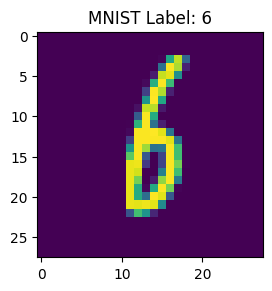

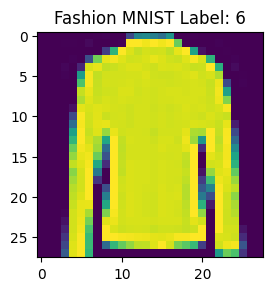

In [ ]:

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = keras.datasets.mnist.load_data()
(fashion_mnist_train_images, fashion_mnist_train_labels), (fashion_mnist_test_images, fashion_mnist_test_labels) = keras.datasets.fashion_mnist.load_data()

mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0
fashion_mnist_train_images = fashion_mnist_train_images / 255.0
fashion_mnist_test_images = fashion_mnist_test_images / 255.0

mnist_combined_data = list(zip(mnist_train_images, mnist_train_labels))
np.random.shuffle(mnist_combined_data)
mnist_train_images, mnist_train_labels = zip(*mnist_combined_data)
mnist_train_images = np.array(mnist_train_images)
mnist_train_labels = np.array(mnist_train_labels)

fashion_mnist_combined_data = list(zip(fashion_mnist_train_images, fashion_mnist_train_labels))
np.random.shuffle(fashion_mnist_combined_data)
fashion_mnist_train_images, fashion_mnist_train_labels = zip(*fashion_mnist_combined_data)
fashion_mnist_train_images = np.array(fashion_mnist_train_images)
fashion_mnist_train_labels = np.array(fashion_mnist_train_labels)

plt.subplot(1, 2, 2)
plt.imshow(mnist_train_images[1])
plt.title(f"MNIST Label: {mnist_train_labels[1]}")

plt.show()

plt.subplot(1, 2, 2)
plt.imshow(fashion_mnist_train_images[1])
plt.title(f"Fashion MNIST Label: {fashion_mnist_train_labels[1]}")

plt.show()

In [ ]:

def simple_model(hidden_neurons=64, activation='relu', input_shape=None):

    if input_shape is None:
        raise ValueError("input_shape must be provided for the first layer.")

    model = keras.Sequential([
        keras.layers.Dense(hidden_neurons, activation=activation, input_shape=input_shape),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) #seems to be typical loss and optimizer used, however, not sure if it is correct
    return model


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8564 - loss: 0.5085 - val_accuracy: 0.9448 - val_loss: 0.1828
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9531 - loss: 0.1584 - val_accuracy: 0.9603 - val_loss: 0.1299
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1095 - val_accuracy: 0.9675 - val_loss: 0.1073
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9747 - loss: 0.0826 - val_accuracy: 0.9692 - val_loss: 0.1009
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9797 - loss: 0.0686 - val_accuracy: 0.9727 - val_loss: 0.0929


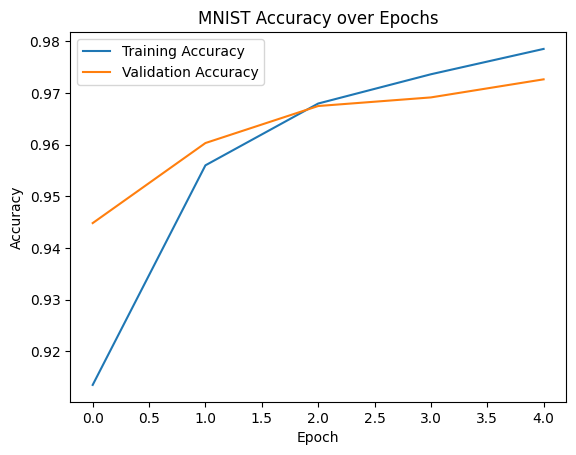

MNIST Test Accuracy: 0.9732
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7629 - loss: 0.6890 - val_accuracy: 0.8547 - val_loss: 0.4232
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8576 - loss: 0.4072 - val_accuracy: 0.8645 - val_loss: 0.3837
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8674 - loss: 0.3633 - val_accuracy: 0.8755 - val_loss: 0.3529
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8795 - loss: 0.3333 - val_accuracy: 0.8812 - val_loss: 0.3426
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.3174 - val_accuracy: 0.8802 - val_loss: 0.3268


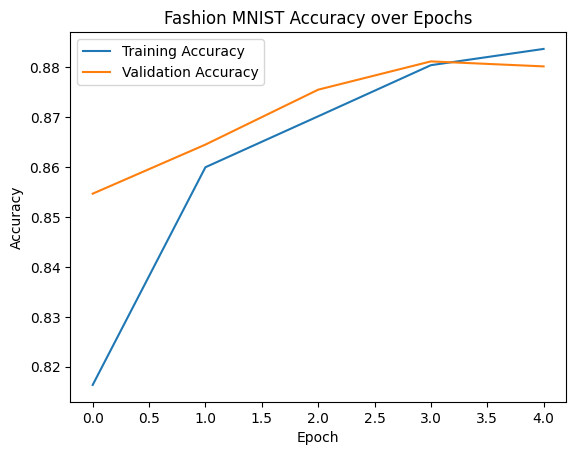

Fashion MNIST Test Accuracy: 0.8704


In [ ]:


def train_and_evaluate(name, x_train, y_train, x_test, y_test):
    model = simple_model(input_shape=(784,))
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) #verbose controls output level, this means silent progress, but I see progress bar, so what is going on?
    print(f"{name} Test Accuracy: {test_acc:.4f}")

train_and_evaluate("MNIST", mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)

train_and_evaluate("Fashion MNIST", fashion_mnist_train_images, fashion_mnist_train_labels, fashion_mnist_test_images, fashion_mnist_test_labels)



In [ ]:
def run_experiments(dataset_name, x_train, y_train, x_test, y_test):
    configs = [
        {"hidden_units": 64, "activation": 'relu'},
        {"hidden_units": 128, "activation": 'relu'},
        {"hidden_units": 64, "activation": 'tanh'}
    ]

    results = []

    for config in configs:
        print(f"\nTraining {dataset_name} with {config['hidden_units']} units and {config['activation']} activation")

        model = simple_model(hidden_neurons=config['hidden_units'],
                             activation=config['activation'],
                             input_shape=(784,))

        history = model.fit(x_train, y_train,
                            epochs=5,
                            batch_size=32,
                            validation_split=0.1,
                            verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {test_acc:.4f}")

        results.append({
            "Hidden Units": config['hidden_units'],
            "Activation": config['activation'],
            "Test Accuracy": round(test_acc, 4)
        })

    return results

mnist_results = run_experiments("MNIST", mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)
fashion_results = run_experiments("Fashion MNIST", fashion_mnist_train_images, fashion_mnist_train_labels, fashion_mnist_test_images, fashion_mnist_test_labels)


def print_results_table(dataset_name, results):
    print(f"\n📊 Test Accuracies for {dataset_name}")
    print(f"{'Hidden Units':<15}{'Activation':<15}{'Test Accuracy':<15}")
    print("-" * 45)
    for r in results:
        print(f"{r['Hidden Units']:<15}{r['Activation']:<15}{r['Test Accuracy']:<15}")

print_results_table("MNIST", mnist_results)
print_results_table("Fashion MNIST", fashion_results)



Training MNIST with 64 units and relu activation
Test Accuracy: 0.9742

Training MNIST with 128 units and relu activation
Test Accuracy: 0.9748

Training MNIST with 64 units and tanh activation
Test Accuracy: 0.9688

Training Fashion MNIST with 64 units and relu activation
Test Accuracy: 0.8658

Training Fashion MNIST with 128 units and relu activation
Test Accuracy: 0.8766

Training Fashion MNIST with 64 units and tanh activation
Test Accuracy: 0.8663

📊 Test Accuracies for MNIST
Hidden Units   Activation     Test Accuracy  
---------------------------------------------
64             relu           0.9742         
128            relu           0.9748         
64             tanh           0.9688         

📊 Test Accuracies for Fashion MNIST
Hidden Units   Activation     Test Accuracy  
---------------------------------------------
64             relu           0.8658         
128            relu           0.8766         
64             tanh           0.8663         


1. Just looking at the accuracy, I think the Mnist was easier to classify which makes sense, because the fashion mnist is comprised of more complicated images, in my opinion, and that reflects ont he accuracy of the classification.
2. Looking at the last table, for mnist, when the hidden units was 64 or 128 with relu, the test accuracy was essentially the same, so I think the accuracy was not really affected.
3. I think the accuracy stayed pretty similar with the relu or tanh activation functions for both datasets.
4. Some difficulties I had were, I had to do this HW in colab because on jupyter lab the kernel was not working, perhaps because datasets were so large that it would not run on jupyter lab? Also, I had a lot of trouble with searching how to use appropriate lossfunction and optimizer and looked to see what is typically used in the field.